# PROYECTO MODELOS AVANZADOS 1 - GRUPO 5

## Integrantes:

* Denis Leonardo Jaimes Campos | Código: 202027884
* Esteban López Zúñiga | Código: 200914313
* Oscar Hernando Ayala Nino | Código: 201920024
* Sebastián Camilo Camargo Bello | Código: 201014774
* Sindy Lorena Murcia Florez | Código: 202028060

# Caso de estudio: Consumo de energía en región de la India

## 2. Descripción de los datos y pregunta clave:

La base cuenta con 498 registros históricos del consumo diario de energía (medido en kWh-hora) per cápita para cada uno de los 9 estados que conforman la región de NR en la India. Esta región, de acuerdo con noticias recientes, ha sufrido de caídas en los servicios de energía por el alto consumo y la limitada capacidad de la planta eléctrica que actualmente abastece la región.

En este sentido, se busca realizar un análisis con estos datos (de 2019 a 2020) con el fin de determinar los periodos/temporadas de mayor consumo en el año, esto en pro de que el gobierno regional pueda tomar decisiones y establecer políticas que incentiven actividades de baja demanda de energía. Así, se plantean las siguientes preguntas de negocios:

* a. ¿Cuáles son los días de la semana con mayor consumo de energía en la región NR?
* b. ¿Cuál es la mejor predicción para el consumo de los próximos 30 días?

In [1]:
# Cargue de la información:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/Proyecto_1/bd_proyecto_1_grupo_5.csv',
                sep=',')

In [3]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [4]:
# Se filtran los estados de la región NR y se ajusta el formato de fecha

df = df.query('Regions == "NR" ')
df.Dates = pd.to_datetime(df.Dates)

# Se crea tabla pivot:
df =  pd.pivot_table(df, index='Dates', columns='States', values='Usage')

# Se crea el total de consumo por los estados de la región NR
df['consumo_total'] = df.sum(axis=1)

In [5]:
df.head()

States,Chandigarh,Delhi,HP,Haryana,J&K,Punjab,Rajasthan,UP,Uttarakhand,consumo_total
Dates,,,,,,,,,,
2019-01-07,4.8,103.8,24.2,157.5,34.8,163.9,180.9,379.4,33.9,1083.2
2019-01-08,5.5,99.3,29.4,140.6,44.9,206.1,223.7,384.1,42.6,1176.2
2019-01-09,5.4,113.9,30.5,200.4,39.1,224.0,240.5,350.6,40.2,1244.6
2019-01-10,3.9,80.7,27.8,142.9,39.9,118.9,208.4,316.5,34.9,973.9
2019-01-11,2.4,52.4,12.1,79.7,40.7,78.2,159.5,271.0,20.1,716.1


In [6]:
df.tail()

States,Chandigarh,Delhi,HP,Haryana,J&K,Punjab,Rajasthan,UP,Uttarakhand,consumo_total
Dates,,,,,,,,,,
2020-05-19,4.1,71.7,30.1,131.6,50.2,120.5,250.3,290.9,39.3,988.7
2020-05-20,4.1,70.7,30.5,131.6,49.7,123.8,251.7,292.0,39.4,993.5
2020-05-21,4.2,73.4,31.1,133.0,51.1,126.0,249.7,295.5,40.1,1004.1
2020-05-22,3.9,62.0,30.3,131.6,50.7,127.2,247.4,295.4,39.2,987.7
2020-05-23,3.5,72.1,27.5,122.9,49.9,121.6,243.3,286.3,35.6,962.7


# 3. Entendimiento de los datos

* Estacionalidad,
* Ciclicidad,
* Autocorrelacion, 
* Comportamiento de los residuos, 
* Among others.

El entendiemiento de los datos se enfoca incialmente en la visualización de estos, se grafican entonces las series de tiempo del consumo de energía para cada Estado de la región NR y el consumo total que correpsonde a la suma de los consumos de todos los estados de la región. Se incluye el promedio de consumo total que equivale a 1008.62 KWH.

In [7]:
import warnings
warnings.filterwarnings('ignore')

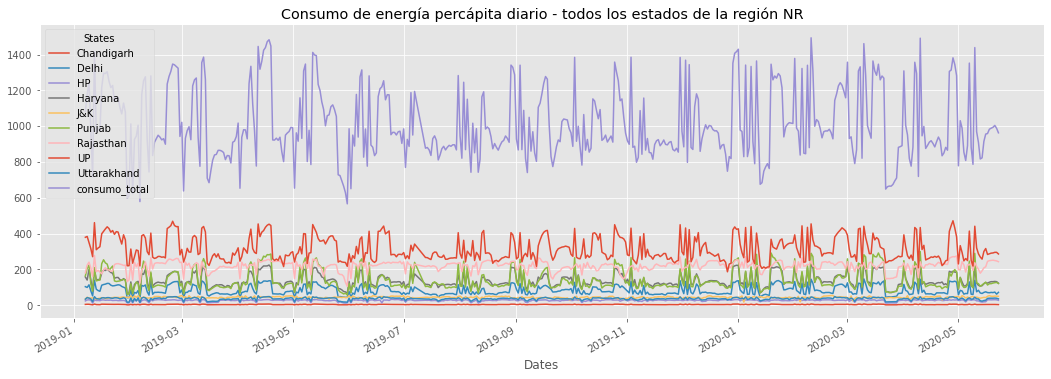

In [8]:
plt.style.use('ggplot')
df.plot(figsize=(18,6), legend=True)
plt.title('Consumo de energía percápita diario - todos los estados de la región NR');

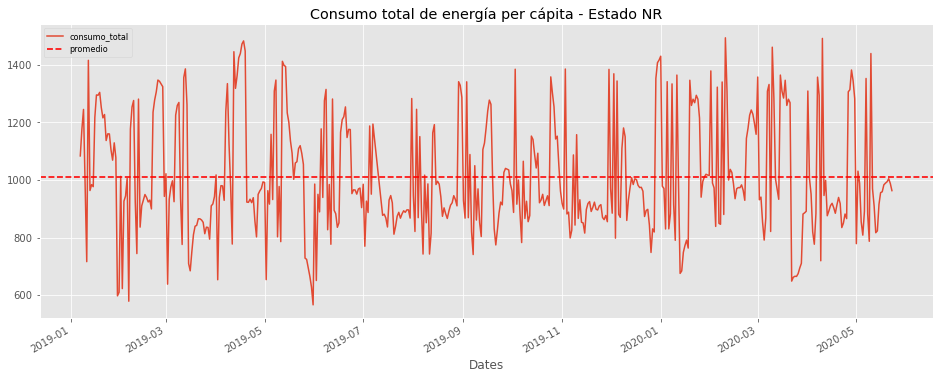

In [9]:
df['consumo_total'].plot(figsize=(16,6), grid=True)
plt.title('Consumo total de energía per cápita - Estado NR')
plt.axhline(df['consumo_total'].mean(), color='red', linewidth=1.6, linestyle="dashed", label='promedio')
plt.legend(fontsize=8);

### 3.1. Estacionalidad

Se observa el comportamiento de las diferencias para ver la estacionalidad de la serie.

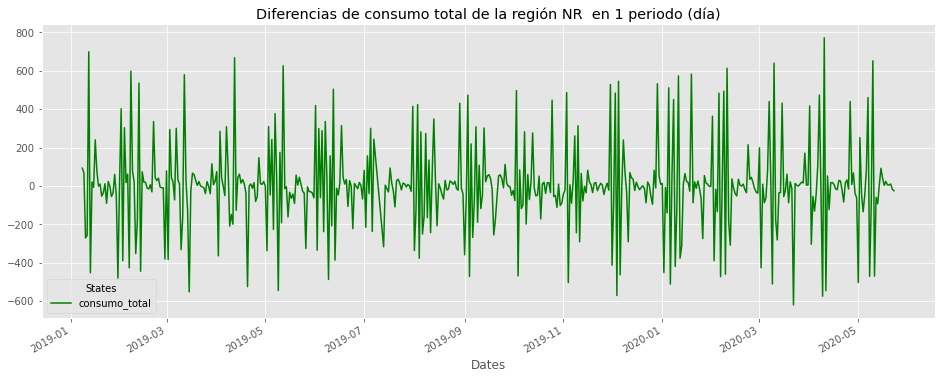

In [10]:
# Se genera la diferencia de un día para ver su comportamiento:
periodo = 1

df[['consumo_total']].diff(periodo).plot(figsize=(16,6), grid=True,color='green')
plt.title('Diferencias de consumo total de la región NR  en {} periodo (día)'.format(periodo));

Se observa como las diferencias más grandes en el consumo diario de energía de un día a otro, van teniendo 'picos' más altos despues de cierto periodo de tiempo (al rededor de 10 días)

### 3.2. Tendencia

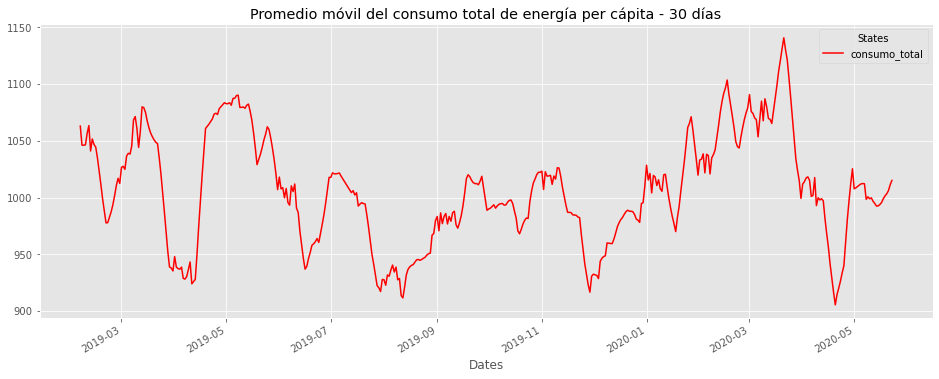

In [11]:
# Se grafica la tendidencia de la serie usando el promedio móvil

prom_movil = 30

df[['consumo_total']].rolling(prom_movil).mean().plot(figsize=(16,6), grid=True,color='red')
plt.title('Promedio móvil del consumo total de energía per cápita - {} días'.format(prom_movil));

Se observa como el promedio de consumo per cápita de energía para 30 días, presenta altibajos a lo largo del periodo de medición: Sube y baja constantemente sin una tendencia marcada.

### 3.3. Autocorrelación

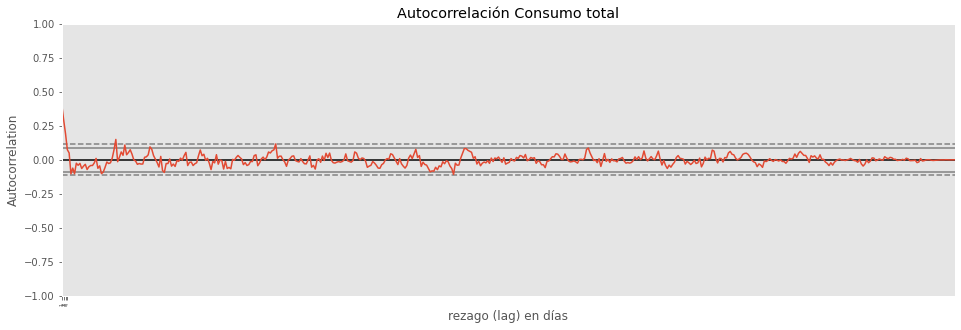

In [12]:
plt.figure(figsize=(16,5))
pd.plotting.autocorrelation_plot(df['consumo_total'])
plt.title('Autocorrelación Consumo total')
plt.xticks(np.arange(1,5), rotation=90, fontsize=5)
plt.xlabel('rezago (lag) en días');

Se observa con el gráfico de autocorrelación que la serie de consumo total de energía tiene una periodicidad de 4 días, esto dado que las autocorrelaciones para rezagos más grandes son más pequeñas (se encuentran casi todas dentro del intervalo de confianza para una autocorrelación cercana a cero.

### 3.4. Prueba de dickey-fuller para evaluar estacionariedad de la serie

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(df['consumo_total'])

(-8.990029029696226,
 6.931983070073212e-15,
 5,
 492,
 {'1%': -3.4437112724287253,
  '5%': -2.8674324209387345,
  '10%': -2.569908433637385},
 6341.943447936858)

Dado que el p_value es < 0.05 (0.0000) , no se acepta H0 (rho - 1 = 0): Rho es estadísticamente igual a 1, 
es decir, Rho -1 es estadísticamente diferente a 0. Como resultado del test, la serie original es estacionaria.

## 4. Aplicación de modelos:


In [15]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

### 4.1. Validación del modelo: ¿es autoregresivo o de media movil?

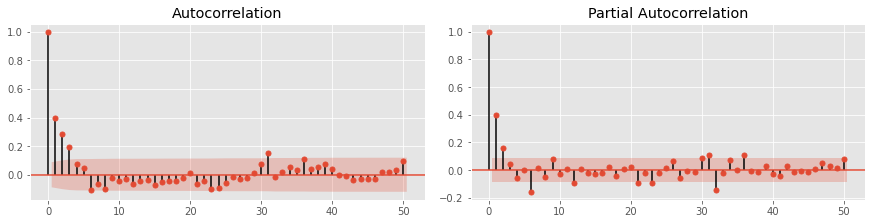

In [16]:
fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,
figsize=(12,3))
fig.figsize=(12,5)

plot_acf(df[['consumo_total']], lags=50,ax=axis[0,0])
plot_pacf(df[['consumo_total']], lags=50,ax=axis[0,1]);


Con el gráfico de autocorrelación y autocorrelación parcial, se observa como para el primero hay señales de que la serie sigue un proceso AR de orden 4 sin embargo, en el gráfico de autocorrelación parcial se puede inducir que la misma sigue un proceso MA de orden 3. 

Dado que la visualización no es tan clara para inferir el tipo de orden de la serie, se realiza una revisión del MSE para un modelo ARIMA evaluando diferentes orden de Autorregresion (AR) y Promedio Móvil (MA):

In [17]:
# Iteración sobre los posibles en un modelo ARIMA(p,d,q), estimando el MSE (test) en cada iteración:

res = pd.DataFrame(columns = ['par_p', 'par_d','par_q','mse_test'])

X = df['consumo_total'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


max_p,max_q,max_d = 6,6,3 # Máximos valores de los parámetros

for p in range(0,max_p):# Cantidad rezagos para un proceso AR
    for q in range(0,max_q): # Cantidad rezagos para un proceso MA
        for d in range(1,max_d): # Cantidad de diferencias parar que la serie sea estacionaria
            try:
                modelo = ARIMA(train, order=(p,d,q)).fit(disp=0)
                pred_ = modelo.forecast(steps=len(test))[0] # predicciones en Test
                error = np.round_(mean_squared_error(test, pred_))
                res = res.append({'par_p': p, 'par_d': d,'par_q': q,'mse_test':int(error)},ignore_index=True)
            except:
                print('No se puede correr el modelo para p:{}, d:{} y q:{}'.format(p,d,q)) # Modelos con error
            

C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

No se puede correr el modelo para p:1, d:2 y q:2


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


No se puede correr el modelo para p:1, d:2 y q:3
No se puede correr el modelo para p:1, d:1 y q:4
No se puede correr el modelo para p:1, d:2 y q:4
No se puede correr el modelo para p:1, d:1 y q:5


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


No se puede correr el modelo para p:2, d:2 y q:2
No se puede correr el modelo para p:2, d:2 y q:3
No se puede correr el modelo para p:2, d:1 y q:4
No se puede correr el modelo para p:2, d:2 y q:4
No se puede correr el modelo para p:2, d:1 y q:5
No se puede correr el modelo para p:3, d:1 y q:2
No se puede correr el modelo para p:3, d:2 y q:2
No se puede correr el modelo para p:3, d:1 y q:3
No se puede correr el modelo para p:3, d:2 y q:3
No se puede correr el modelo para p:3, d:1 y q:4
No se puede correr el modelo para p:3, d:2 y q:4
No se puede correr el modelo para p:3, d:1 y q:5


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


No se puede correr el modelo para p:4, d:1 y q:2
No se puede correr el modelo para p:4, d:1 y q:3
No se puede correr el modelo para p:4, d:1 y q:4


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


No se puede correr el modelo para p:4, d:1 y q:5


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


No se puede correr el modelo para p:5, d:1 y q:5


C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [67]:
# Visualización del error por cada modelo
res.sort_values(by='mse_test').head(7) # para un d>=1

,par_p,par_d,par_q,mse_test
49,5,2,5,46397
25,2,2,5,49987
43,5,1,2,50834
45,5,1,3,50925
47,5,1,4,50992
21,2,1,1,51329
24,2,1,3,51341


Se obtiene que los mejores parámetros para el mejor modelo ARIMA son (0,0,0) es decir, el promedio de la serie original es el mejor modelo (menor MSE) lo cual indica que la serie no presenta órdenes marcados para proceso autoregresivo o de media móvil que disminuyan considerablemente el error con respecto al promedio general (punto de corte de la regresión). Por otro lado, el mejor modelo que considera valores para los parámetros p,d y q con valor >=1 es Autoregresivo de orden 5 (p=5), con diferencia de 2 periodos (d=2) y q = 5 (orden 5 Proceso MA).

Al generar el modelo con las datos completos se observa que para la combinación de algunos de los parámetros obtenidos en train no funcionana para generar un modelo ARIMA con todos los datos, la única combinación con el menor MSE en test que funciona para ello es la del modelo ARIMA(2,1,1).

In [68]:
# Se entrena el modelo ARIMA con los parámetros que menor MSE nos dieron (2,1,1) para todos los datos

modelo_completo = ARIMA(df['consumo_total'], order=(2,1,1)).fit()
print(modelo_completo.summary())

C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Geotrend\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:        D.consumo_total   No. Observations:                  497
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3293.782
Method:                       css-mle   S.D. of innovations            181.872
Date:                Sun, 18 Jul 2021   AIC                           6597.564
Time:                        17:47:53   BIC                           6618.607
Sample:                             1   HQIC                          6605.823
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0395      0.111     -0.356      0.722      -0.257       0.178
ar.L1.D.consumo_total     0.3347      0.044      7.556      0.000       0.248       0.422
ar.L2.D.

###### Predicción vs Valroe real - ARIMA

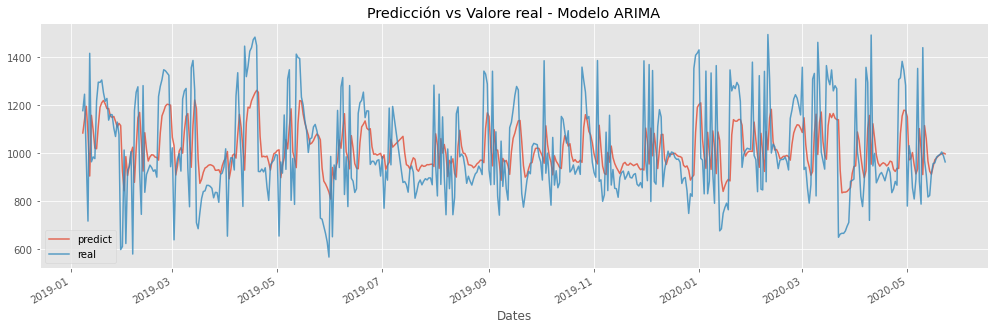

In [69]:
pd.DataFrame({'predict':modelo_completo.predict(typ='levels').values,
              'real': df['consumo_total'].iloc[1:]}).plot(figsize=(17,5), alpha=0.8)
plt.title('Predicción vs Valore real - Modelo ARIMA');

##### Análisis de residuos

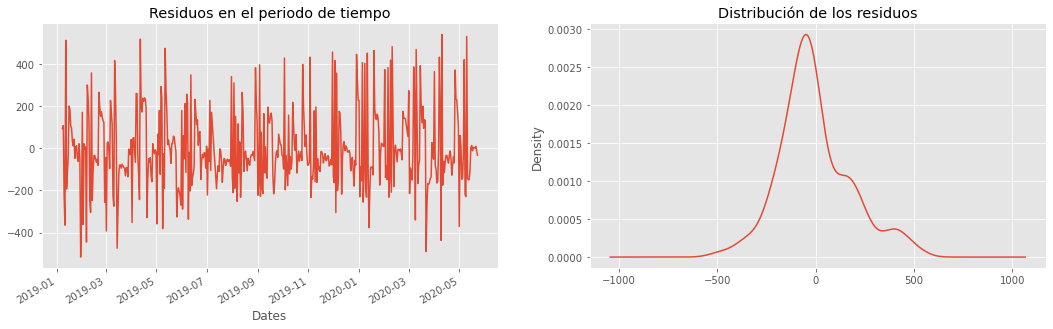

In [70]:
# Análisis de los residuos:

fig, axis=plt.subplots(1,2 ,sharex=False, sharey=False, squeeze=False,constrained_layout=True,figsize=(15,3))
fig.figsize=(15,5)


modelo_completo.resid.plot(figsize=(18,5),ax=axis[0,0])
axis[0,0].set_title('Residuos en el periodo de tiempo')
modelo_completo.resid.plot(figsize=(18,5),ax=axis[0,1], kind='kde')
axis[0,1].set_title('Distribución de los residuos');


In [71]:
modelo_completo.resid.describe()

count    497.000000
mean      -5.128127
std      183.024699
min     -516.327835
25%     -112.252520
50%      -34.168310
75%      103.700324
max      538.259723
dtype: float64

In [72]:
from scipy.stats import shapiro as sh
print('P_value:',sh(modelo_completo.resid)[1])

P_value: 1.668541527166667e-09


Se observa como los residuos presentan un comportamiento oscilante a lo largo del tiempo, igualmente, se confirma mediante una prueba estadística (Shapiro) que su distribución no se distribuye normal. Así mismo, se evidencia como esta presenta un sesgo negativo (valor de la media de la distribucipon es negativo).

##### Predicciones ARIMA próximos 30 días

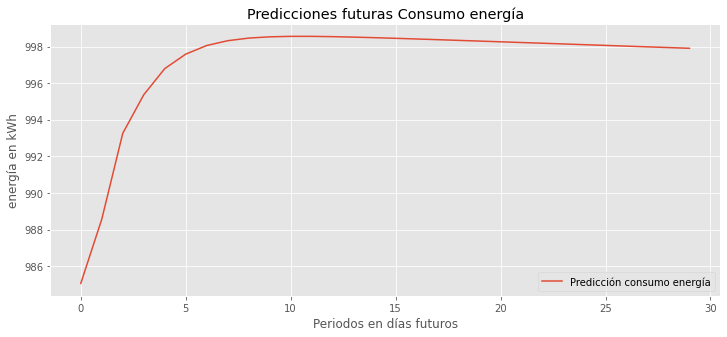

In [73]:
pred_futuras = modelo_completo.forecast(30)[0]
pd.DataFrame(pred_futuras, columns=['Predicción consumo energía']).plot(title='Predicciones futuras Consumo energía',
                                                                                        figsize=(12,5))
plt.ylabel('energía en kWh')
plt.xlabel('Periodos en días futuros');

### 4.2. Modelo Prophet

In [40]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [41]:
#Se crea el dataframe con las características que requiere Prophet
df1 = pd.DataFrame()
df1['y']=df['consumo_total']
df1['ds']=df.index
df1.head()

,y,ds
Dates,,
2019-01-07,1083.2,2019-01-07
2019-01-08,1176.2,2019-01-08
2019-01-09,1244.6,2019-01-09
2019-01-10,973.9,2019-01-10
2019-01-11,716.1,2019-01-11


In [42]:
#Creamos el marco de datos de la predicción que incluya los datos históricos y 365 días adicionales de predicción 

m1 = Prophet()
m1.fit(df1)

future1 = m1.make_future_dataframe(periods=30, freq='d')
future1.tail(6)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
522,2020-06-17
523,2020-06-18
524,2020-06-19
525,2020-06-20
526,2020-06-21
527,2020-06-22


In [43]:
#Se usa el método predict nos permite asignar a cada fila del marco de datos creado un valor de predicción yhat y los intervalos de incertidumbre
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
522,2020-06-17,1019.933154,755.448747,1283.336663
523,2020-06-18,991.129994,732.584333,1257.437536
524,2020-06-19,994.777967,724.053441,1258.857934
525,2020-06-20,1006.289480,746.029123,1274.786028
526,2020-06-21,1026.397002,796.050613,1291.052075
527,2020-06-22,995.060440,720.529179,1227.220798


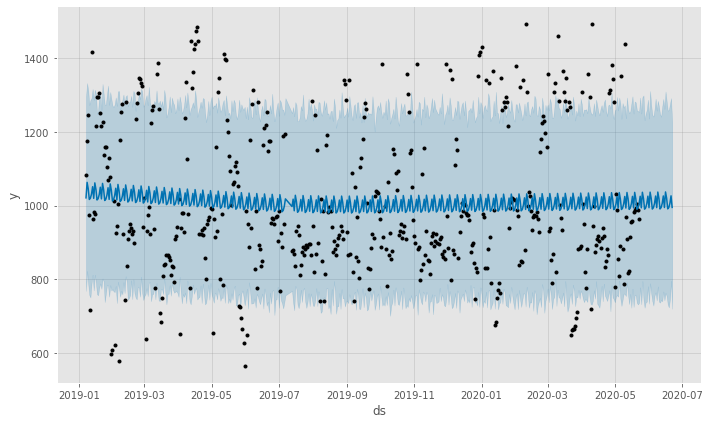

In [44]:
# Se Grafica el pronóstico
m1.plot(forecast1);

Ahora se muestran los componentes de la previsión que reflejan en la tendencia mensual una tendencia decreciente y posterirmente un cambio de tendencia a partir de septiembre de 2019, donde vuelve a crecer hasta mayo de 2020. Por otra parte, el análisis de la tendencia diario permite determinar que los consumos de energía per capita presentan una caida importante hacia los días lunes incrementándose los días martes dismuyendo hasta los ´dia sjueves y volviendo a ser creciente desde el viernes y durante todo el fin de semana.

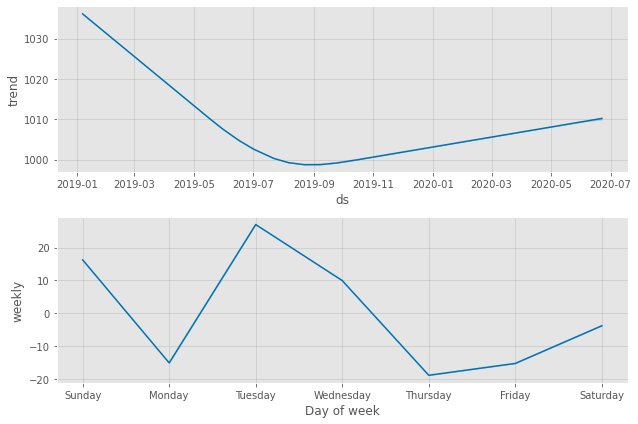

In [45]:
# Se muestran los componentes de la previsión
m1.plot_components(forecast1);

Ahora, la evaluación del desempeño de las predicciones usando la función cross_validation se muestra a continuación. Para el procedimiento de validación cruzada se especifica el horizonte de pronóstico en 30 días equivalente a 1 mes, al no incluir parámteros de inicialización y de corte, por defecto se tiene que el período de entrenamiento inicial ( initial) se establece en tres veces el horizonte, es decir a partir del 14 de abril de 2019 y el espacio entre las fechas de corte ( period) se realizan cada medio horizonte.

In [46]:
from fbprophet.diagnostics import cross_validation

In [47]:
data_cv1 = cross_validation(m1, horizon='30 days')

INFO:fbprophet:Making 26 forecasts with cutoffs between 2019-04-14 00:00:00 and 2020-04-23 00:00:00


In [48]:
data_cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-15,949.290077,679.094032,1205.984242,1423.6,2019-04-14
1,2019-04-16,1000.756695,721.468365,1276.027127,1438.7,2019-04-14
2,2019-04-17,923.903269,643.156790,1200.729068,1471.8,2019-04-14
3,2019-04-18,957.524013,697.655929,1244.183667,1482.5,2019-04-14
4,2019-04-19,1002.152015,732.288147,1280.112742,1447.1,2019-04-14


In [49]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

performance_metrics(data_cv1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,54449.348530,233.343842,186.336616,0.185311,0.155364,0.730270
1,4 days,55066.291164,234.662079,182.624226,0.178152,0.139156,0.705295
2,5 days,46912.163614,216.592160,162.980322,0.157287,0.129165,0.730769
3,6 days,42404.801326,205.924261,156.525530,0.148407,0.102061,0.757243
4,7 days,42169.735493,205.352710,156.798702,0.140635,0.128215,0.756244
5,8 days,39269.512501,198.165367,151.985392,0.135153,0.098364,0.794705
6,9 days,35109.464856,187.375198,140.618037,0.126685,0.094246,0.835165
7,10 days,28946.842581,170.137717,128.581048,0.121683,0.094246,0.883117
8,11 days,25982.818374,161.191868,125.907630,0.126660,0.114754,0.881618
9,12 days,27520.643713,165.893471,131.643308,0.137897,0.130545,0.855145


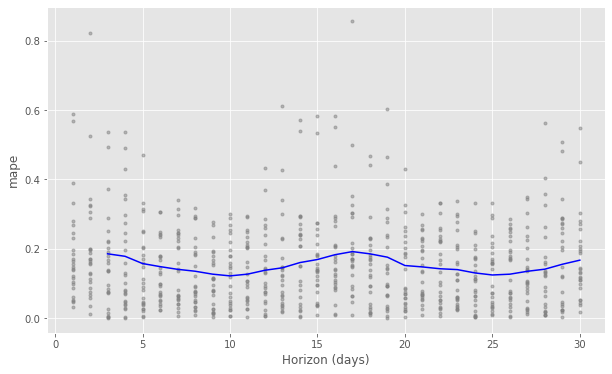

In [29]:
plot_cross_validation_metric(data_cv1, metric='mape');

La gráfica MAPE, nos muestra en general el error porcentual absoluto medio, en este sentido tenemos un error del pronóstico no mayor al 20% para todo el horizonte de 30 días. Sin embargo, se identifica para este pronóstico los errores de alrededor del 15% para las predicciones de 10 y 25 días en el futuro, y que los errores aumentan hasta alrededor del 20% para las predicciones que se realizan dentro de menos de 5, 18 y 30 días.

In [63]:
#Predicciones próximos 30 días Prophet
#modelo_completo.forecast(30)[0]
pred_futuras2=forecast1[['yhat']].tail(30)
pred_futuras2.head()

,yhat
498,1025.252525
499,993.915963
500,1036.098661
501,1019.074796
502,990.271636


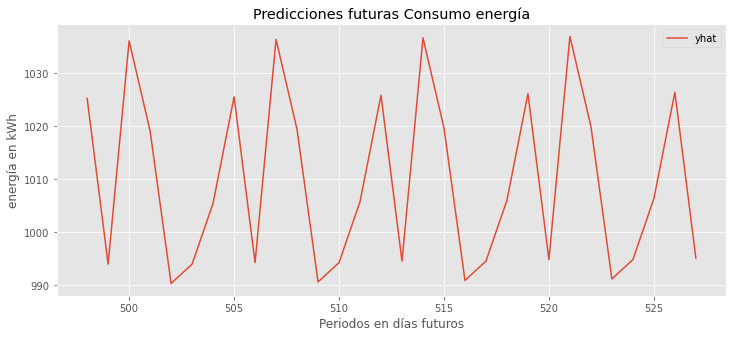

In [60]:
pred_futuras2.plot(title='Predicciones futuras Consumo energía',figsize=(12,5))
plt.ylabel('energía en kWh')
plt.xlabel('Periodos en días futuros');

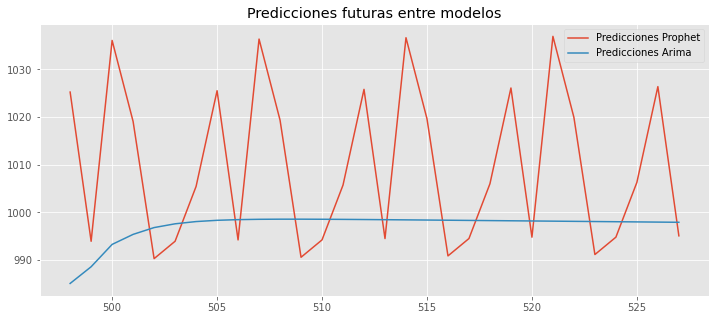

In [107]:
resumen=pd.DataFrame({'Predicciones Prophet':pred_futuras2['yhat'], 'Predicciones Arima':pred_futuras})
resumen.plot(figsize=(12,5),title='Predicciones futuras entre modelos');

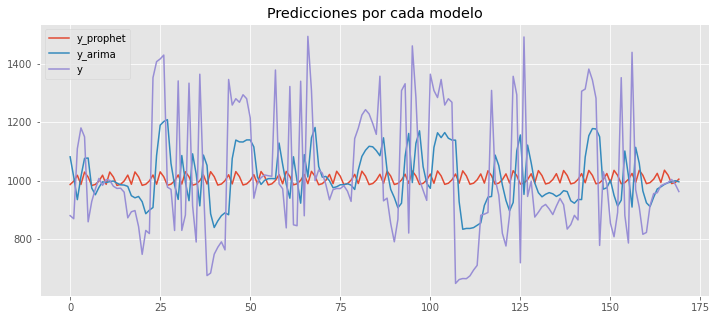

In [109]:
resumen=pd.DataFrame({'y_prophet':pred_futuras3.values, 'y_arima':modelo_completo.predict(typ='levels').values[-170:],
                     'y':df['consumo_total'].iloc[-170:].values})
resumen.plot(figsize=(12,5),title='Predicciones por cada modelo');

In [115]:
#Calculo del MSE prophet en test
mse_prophet=mean_squared_error(resumen.y,resumen.y_prophet)
mse_prophet

44251.17952317338

In [116]:
#Calculo del MSE ARIMA en test
mse_arima=mean_squared_error(resumen.y,resumen.y_arima)
mse_arima

39220.51683560421

### 5. Conclusiones respecto al análisis técnico

1. La serie de consumo per capita de energía de la región NR de la India se considera estacionaria para el periodo de 2019 a 2020 en análisis.

2. Al analizar los gráficos de correlación se encuentra que la serie d etiempo puede tener una periodicidad de cuatro (4) días.

3. Gráficamente (gráficos de autocorrelación y autocorrelación parcial) no se pudo determinar si la serie sigue un proceso autorregresivo o de media móvil.

4. La falta de claridad de los gráficos de autocorrelación y autocorrelación parcial generan la necesidad ajustar múltiples modelos ARIMA con diferentes parámetros para encontrar la combinación óptima que minimice el error en la predicción.

5. El modelo ARIMA que mejor se ajusta a la serie de tiempo, es un modelo (2,1,1).

6. Se encontró que los residuos obtenidos del mejor modelo ARIMA,(2,1,1), no se distribuyen normal con un promedio negativo equivalente a -5, lo cual indica un sesgo.

7. El modelo prophet permite identificar la estacionalidad de los datos semanalmente.

8. En términos del MSE, las predicciones obtenidas por el modelo ARIMA presentan un mejor desempeño que las resultantes del modelo prophet (Esto con respecto a las últimas 170 observaciones de la serie de tiempo).

9. Se observa que las predicciones a 30 días del modelo prophet presentan una ciclidad semanal (los picos altos y bajos se repiten aproximadamente cada 7 días)


### 6. Conclusiones respecto a la pregunta de negocio

a. ¿Cuáles son los días de la semana con mayor consumo de energía en la región NR?

Conforme a lo observado el día martes presenta el mayor consumo promedio de energía per capita en la región NR, seguido por los consumos registrados durante los fines de semana. Por su parte, el menor consumo promedio de energía per capita se obtiene los días jueves.

b. ¿Cuál es la mejor predicción para el consumo de los próximos 30 días?

La predicción del consumo promedio per capita de los próximos 30 días se encuentra entre 995 y 1038 KWH promedio, esto de acuerdo con las predicciones estimadas por los modelos ARIMA y Prophet.Como se ha identificado anteriormente, es importante resaltar que el modelo ARIMA presenta menos oscilaciones, mostrando una tendencia creciente, mientras que el modelo Prophet genera una predicción más fluctuante.